Import Important Libraries

In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Load The Data

In [44]:
df = pd.read_csv("E:/data science internship task 1/worldpopulationdata.csv")


Data Preprocessing

In [45]:

df.drop(['Series Name', 'Country Code'], axis=1, inplace=True)
total_population_data = df[df['Series Code'] == 'SP.POP.TOTL']
total_population_sorted = total_population_data.sort_values(by="2022", ascending=False)
total_top_ten_countries = total_population_sorted.head(10)

Plot Top Ten Countries of Total Population (2022, 2016, 2010, 2001)


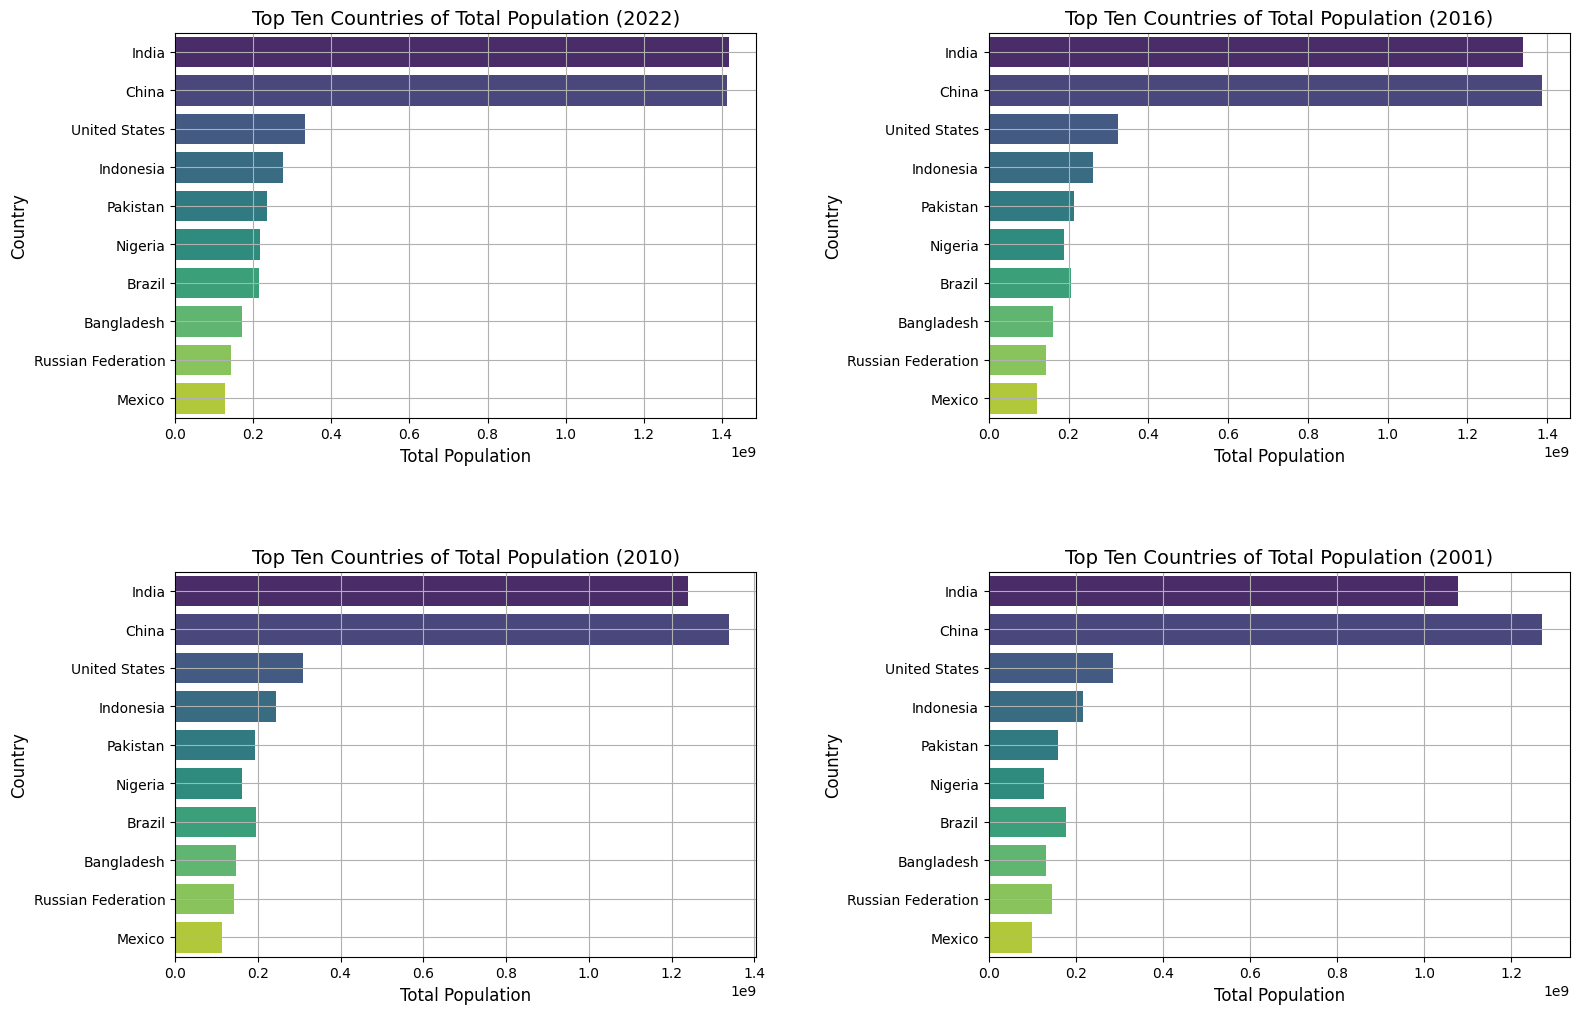

In [46]:
years = ["2022", "2016", "2010", "2001"]
titles = ["Top Ten Countries of Total Population (2022)", 
          "Top Ten Countries of Total Population (2016)", 
          "Top Ten Countries of Total Population (2010)", 
          "Top Ten Countries of Total Population (2001)"]

fig, axs = plt.subplots(2, 2, figsize=(18, 12))
fig.subplots_adjust(hspace=0.4, wspace=0.4)

for i, year in enumerate(years):
    row, col = divmod(i, 2)
    sns.barplot(x=year, y="Country Name", hue="Country Name", data=total_top_ten_countries, palette="viridis", ax=axs[row, col], legend=False)
    axs[row, col].set_title(titles[i], fontsize=14)
    axs[row, col].set_xlabel("Total Population", fontsize=12)
    axs[row, col].set_ylabel("Country", fontsize=12)
    axs[row, col].grid(True)

plt.show()

Plot Bottom Ten Countries of Total Population (2022, 2016, 2010, 2001)

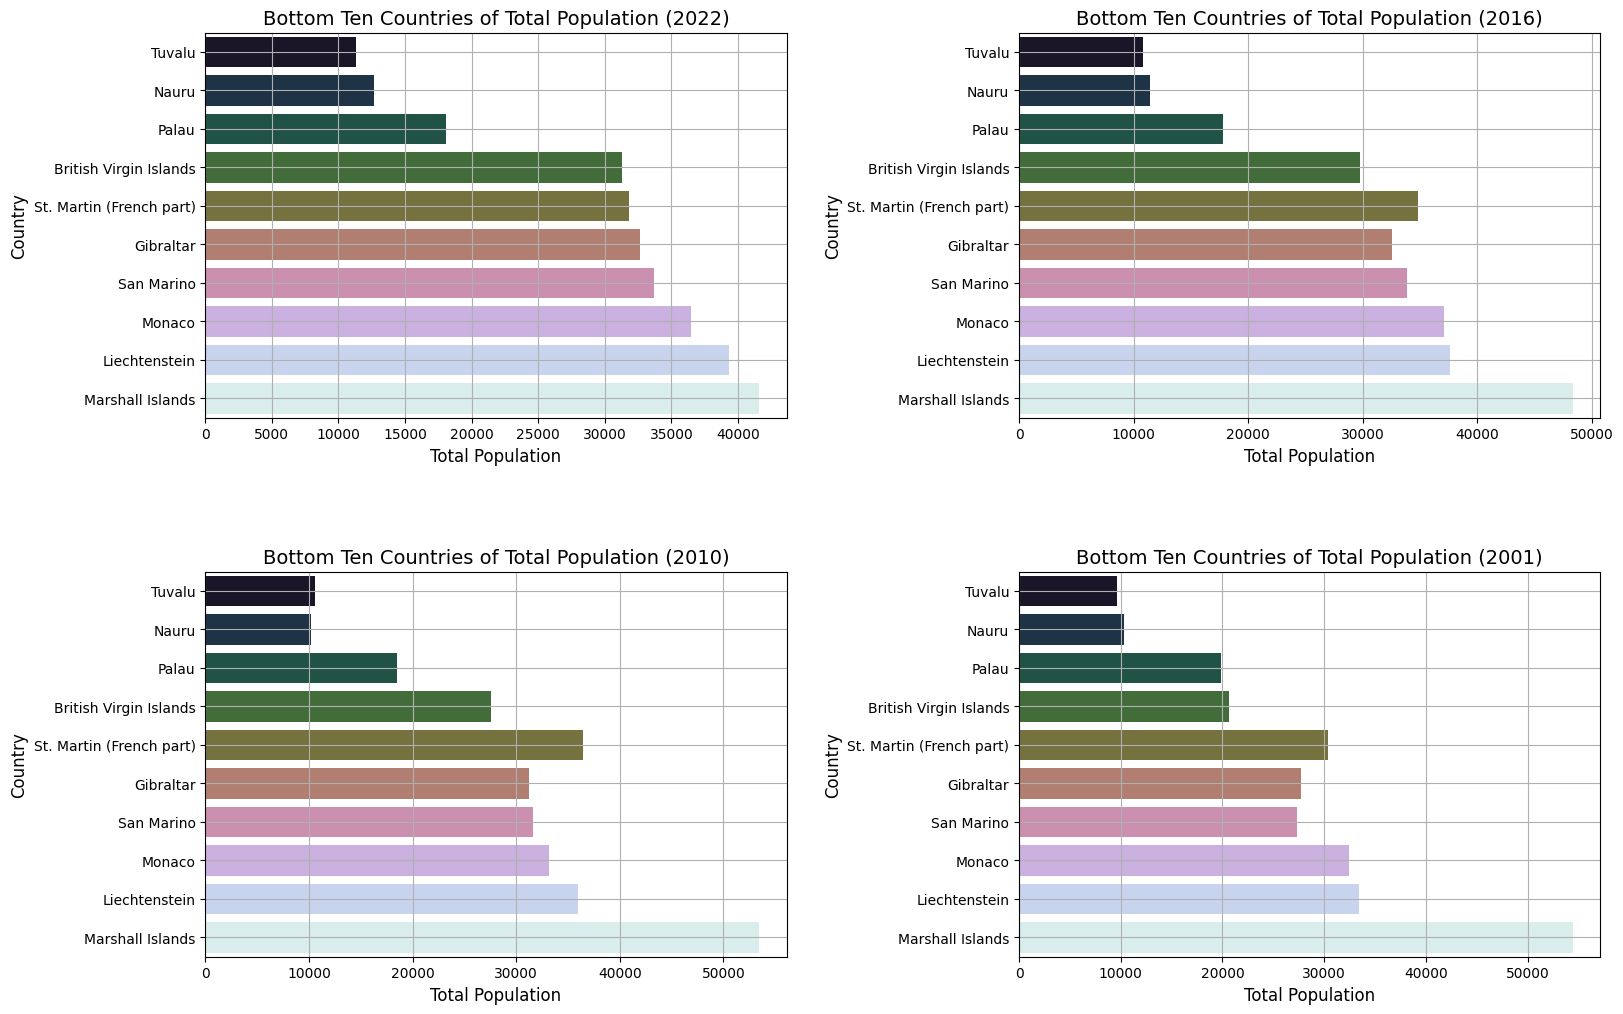

In [47]:
total_population_sorted1 = total_population_data.sort_values(by="2022", ascending=True)

total_bottom_ten_countries = total_population_sorted1.head(10)

titles_bottom = ["Bottom Ten Countries of Total Population (2022)", 
                 "Bottom Ten Countries of Total Population (2016)", 
                 "Bottom Ten Countries of Total Population (2010)", 
                 "Bottom Ten Countries of Total Population (2001)"]

fig, axs = plt.subplots(2, 2, figsize=(18, 12))
fig.subplots_adjust(hspace=0.4, wspace=0.4)

for i, year in enumerate(years):
    row, col = divmod(i, 2)
    sns.barplot(x=year, y="Country Name", hue="Country Name", data=total_bottom_ten_countries, palette="cubehelix", ax=axs[row, col], legend=False)
    axs[row, col].set_title(titles_bottom[i], fontsize=14)
    axs[row, col].set_xlabel("Total Population", fontsize=12)
    axs[row, col].set_ylabel("Country", fontsize=12)
    axs[row, col].grid(True)

plt.show()

Male and Female Population (2022)

In [48]:
male_population_data = df[df["Series Code"] == "SP.POP.TOTL.MA.IN"]
female_population_data = df[df["Series Code"] == "SP.POP.TOTL.FE.IN"]



Plot Top Ten Countries with Highest Male and Female Population (2022)

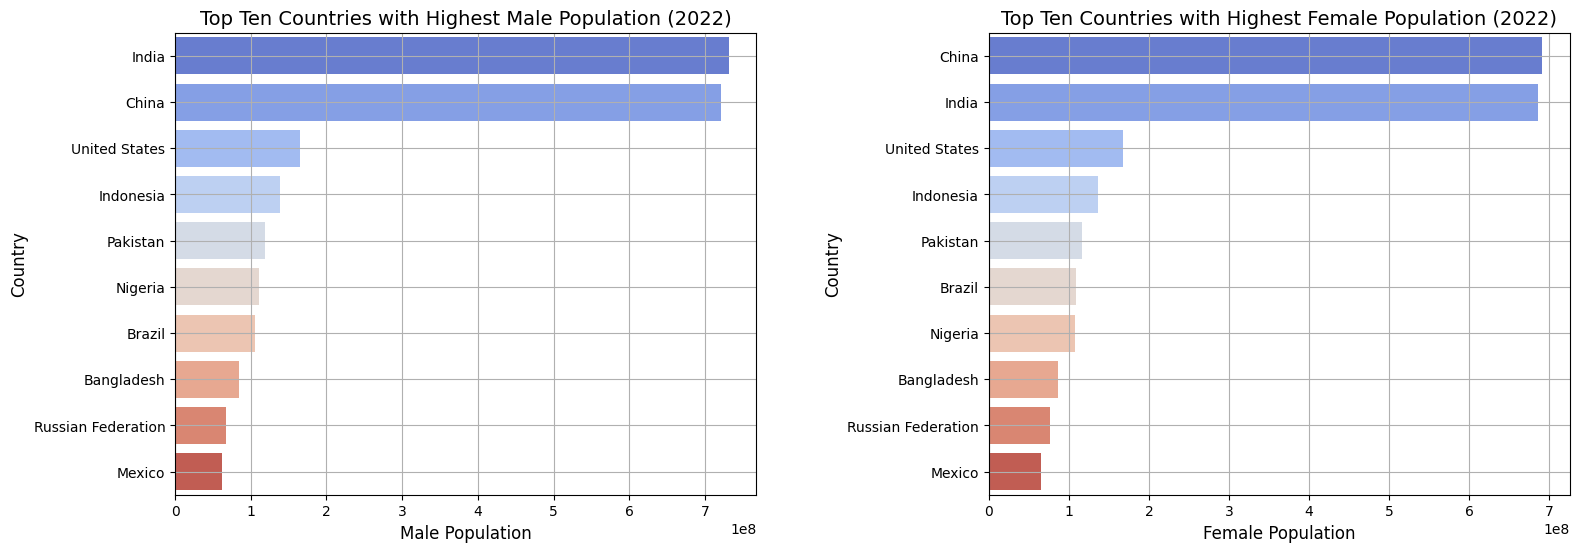

In [49]:
male_population_sorted = male_population_data.sort_values(by="2022", ascending=False)
female_population_sorted = female_population_data.sort_values(by="2022", ascending=False)
male_top_ten_countries = male_population_sorted.head(10)
female_top_ten_countries = female_population_sorted.head(10)

fig, axs = plt.subplots(1, 2, figsize=(18, 6))
fig.subplots_adjust(hspace=0.4, wspace=0.4)

sns.barplot(x="2022", y="Country Name", hue="Country Name", data=male_top_ten_countries, palette="coolwarm", ax=axs[0], legend=False)
axs[0].set_title("Top Ten Countries with Highest Male Population (2022)", fontsize=14)
axs[0].set_xlabel("Male Population", fontsize=12)
axs[0].set_ylabel("Country", fontsize=12)
axs[0].grid(True)

sns.barplot(x="2022", y="Country Name", hue="Country Name", data=female_top_ten_countries, palette="coolwarm", ax=axs[1], legend=False)
axs[1].set_title("Top Ten Countries with Highest Female Population (2022)", fontsize=14)
axs[1].set_xlabel("Female Population", fontsize=12)
axs[1].set_ylabel("Country", fontsize=12)
axs[1].grid(True)

plt.show()

Bottom Ten Countries with Lowest Male and Female Population (2022)


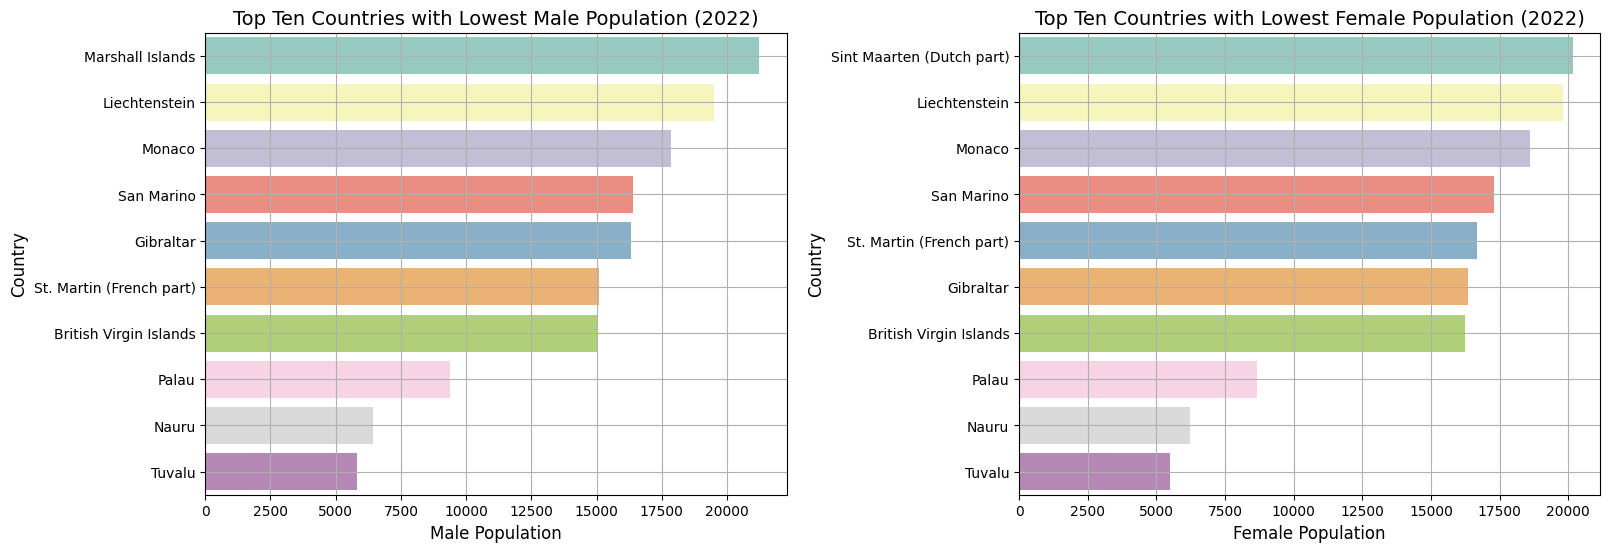

In [50]:
male_lowest_ten_countries = male_population_sorted.tail(10)
female_lowest_ten_countries = female_population_sorted.tail(10)

fig, axs = plt.subplots(1, 2, figsize=(18, 6))
fig.subplots_adjust(hspace=0.4, wspace=0.4)

sns.barplot(x="2022", y="Country Name", hue="Country Name", data=male_lowest_ten_countries, palette="Set3", ax=axs[0], legend=False)
axs[0].set_title("Top Ten Countries with Lowest Male Population (2022)", fontsize=14)
axs[0].set_xlabel("Male Population", fontsize=12)
axs[0].set_ylabel("Country", fontsize=12)
axs[0].grid(True)

sns.barplot(x="2022", y="Country Name", hue="Country Name", data=female_lowest_ten_countries, palette="Set3", ax=axs[1], legend=False)
axs[1].set_title("Top Ten Countries with Lowest Female Population (2022)", fontsize=14)
axs[1].set_xlabel("Female Population", fontsize=12)
axs[1].set_ylabel("Country", fontsize=12)
axs[1].grid(True)

plt.show()

Stacked bar chart of top and bottom 10 countries by male and female population (2022)

In [51]:
merged_data = pd.merge(male_population_data, female_population_data, on="Country Name", suffixes=("_male", "_female"))
merged_data["Total Population"] = merged_data["2022_male"] + merged_data["2022_female"]
sorted_data = merged_data.sort_values(by="Total Population", ascending=False)
top_10_countries = sorted_data.head(10)
bottom_10_countries = sorted_data.tail(10)

Plot for top 10 countries

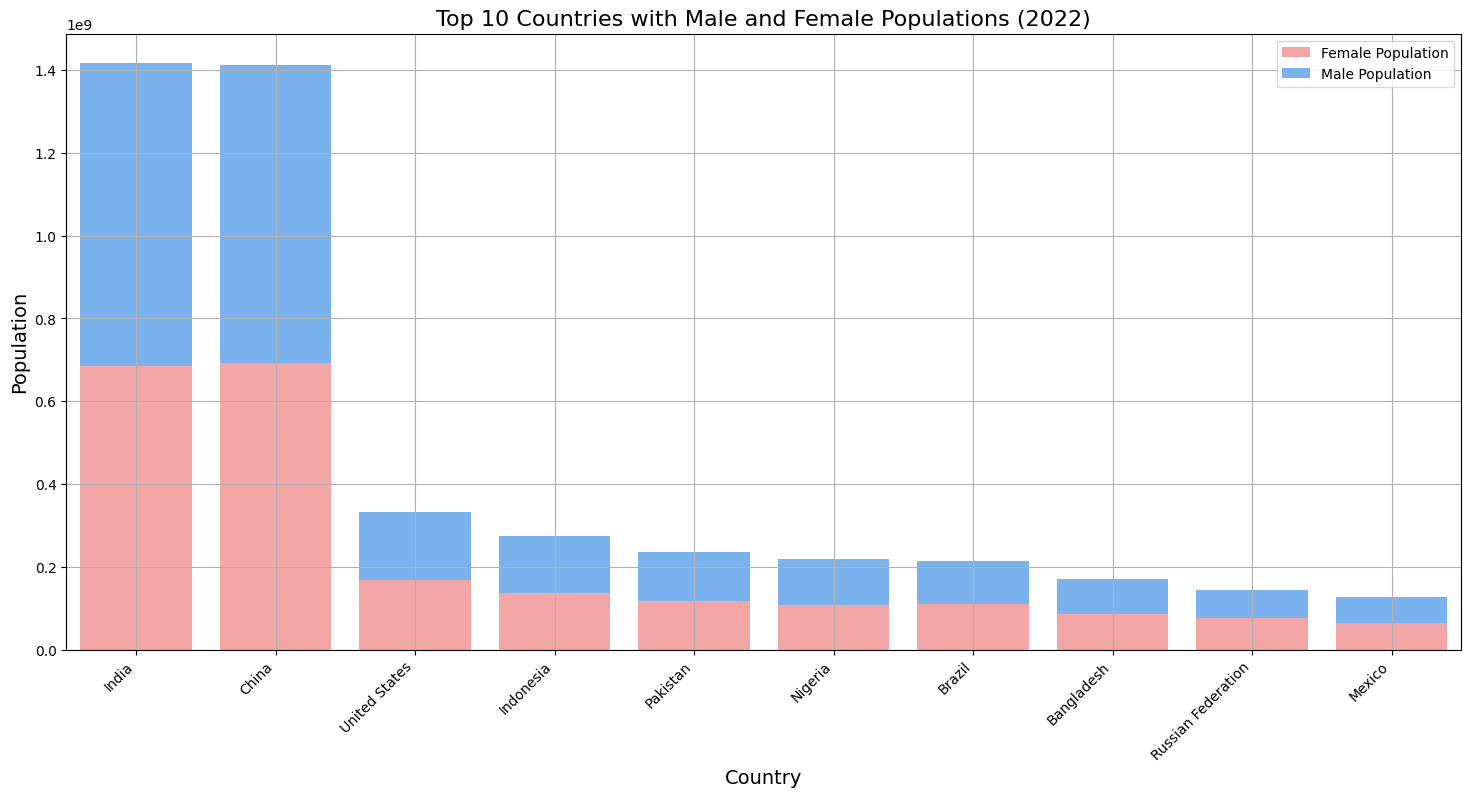

In [52]:
plt.figure(figsize=(18, 8))
sns.barplot(x="Country Name", y="2022_female", data=top_10_countries, color="#FF9999", label="Female Population")
sns.barplot(x="Country Name", y="2022_male", data=top_10_countries, bottom=top_10_countries["2022_female"], color="#66B2FF", label="Male Population")
plt.title("Top 10 Countries with Male and Female Populations (2022)", fontsize=16)
plt.xlabel("Country", fontsize=14)
plt.ylabel("Population", fontsize=14)
plt.legend()
plt.xticks(rotation=45, ha="right")
plt.grid(True)
plt.show()

Plot for bottom 10 countries

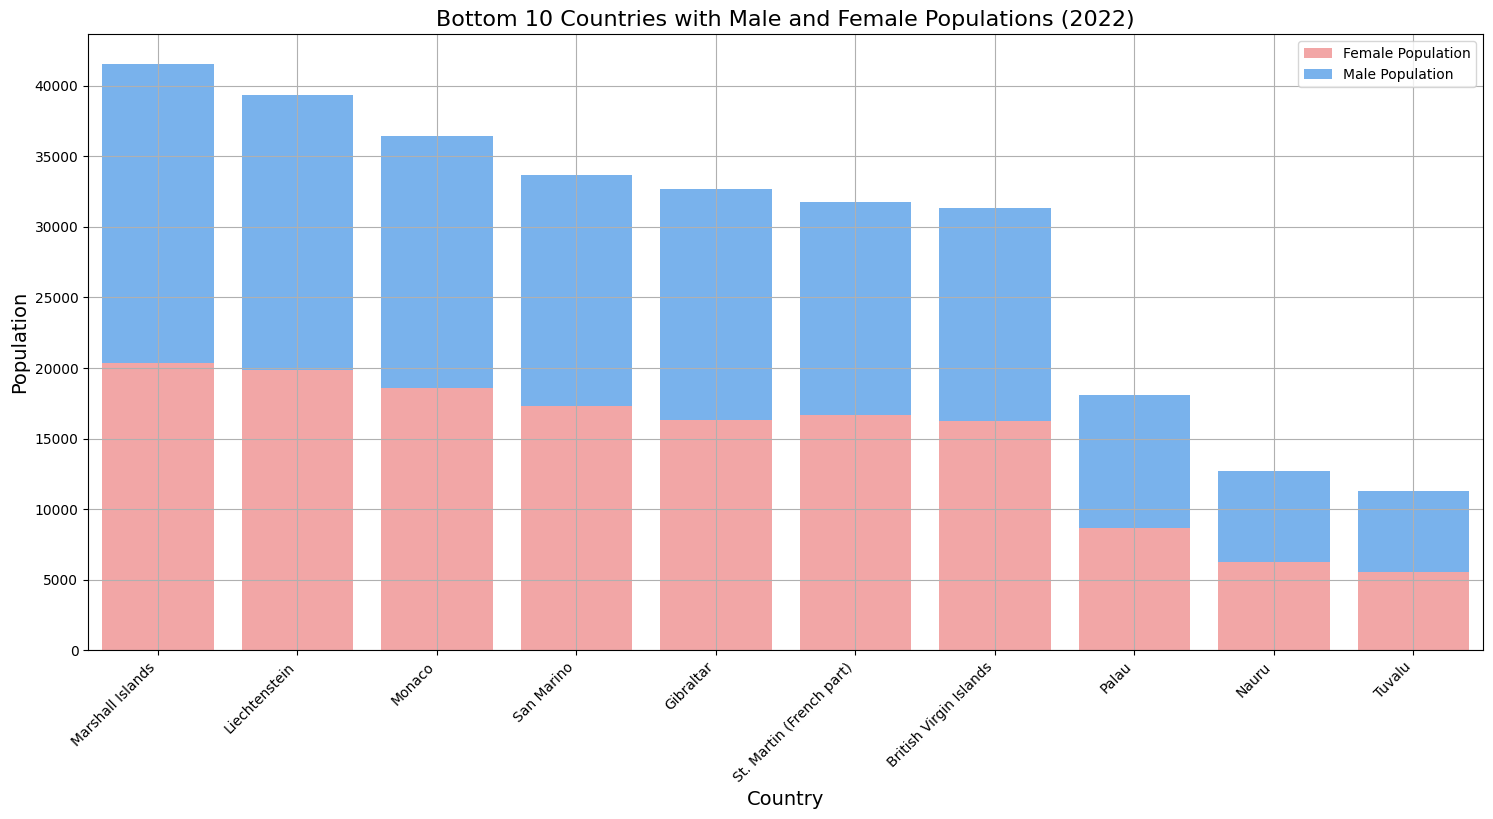

In [53]:
plt.figure(figsize=(18, 8))
sns.barplot(x="Country Name", y="2022_female", data=bottom_10_countries, color="#FF9999", label="Female Population")
sns.barplot(x="Country Name", y="2022_male", data=bottom_10_countries, bottom=bottom_10_countries["2022_female"], color="#66B2FF", label="Male Population")
plt.title("Bottom 10 Countries with Male and Female Populations (2022)", fontsize=16)
plt.xlabel("Country", fontsize=14)
plt.ylabel("Population", fontsize=14)
plt.legend()
plt.xticks(rotation=45, ha="right")
plt.grid(True)
plt.show()